### Zane Reynolds Python Project
The goal of this project is to create a satellite map that displays the coordinates stored in a csv file that 3 different squads took for their "Training Mission" The coordinates were gathered by me who walked around the Polytechnic campus and pinged my location at different time intervals for realism. The code is able to update constantly if new coordinates are entered in the csv file and will show the newly updated plot. The plot displays the coordinates for the x and y axis, as well as provides a line to show the exact path that was taken. The code is also capable of displaying the total time that it took the squads to reach their final location, as well as the distance (km) between each coordinate. The code will ask the user which squad they would like to see and notify them if they inputed the wrong names and ask again. The user will have the option to see Squad 1, Squad 2, Squad 3, or All Squads. An "x" Will be displayed on the plot to signify the final location of the squads. I was unable to to get the a satellite image to display behind the graph without blocking the data being displayed. 

In [ ]:
!pip install geopy
!pip install pandas
!pip install matplotlib

It took Squad 1 to reach their final location in 41.0 minutes
Distances for Squad 1:
Distance between (33.29450024638926, -60.6690459147886) and (33.293906821581565, -60.66916310404129): 0.07 km
Distance between (33.293906821581565, -60.66916310404129) and (33.29384294029429, -60.66936279092846): 0.02 km
Distance between (33.29384294029429, -60.66936279092846) and (33.29431915877953, -60.66995792001013): 0.08 km
Distance between (33.29431915877953, -60.66995792001013) and (33.29447666325491, -60.66826311175569): 0.16 km
Distance between (33.29447666325491, -60.66826311175569) and (33.29462698601455, -60.66858554755453): 0.03 km
Distance between (33.29462698601455, -60.66858554755453) and (33.29462698601455, -60.66858554755453): 0.00 km

It took Squad 2 to reach their final location in 53.0 minutes
Distances for Squad 2:
Distance between (33.29450024638926, -60.6690459147886) and (33.29453533065265, -60.66875919795862): 0.03 km
Distance between (33.29453533065265, -60.66875919795862) an

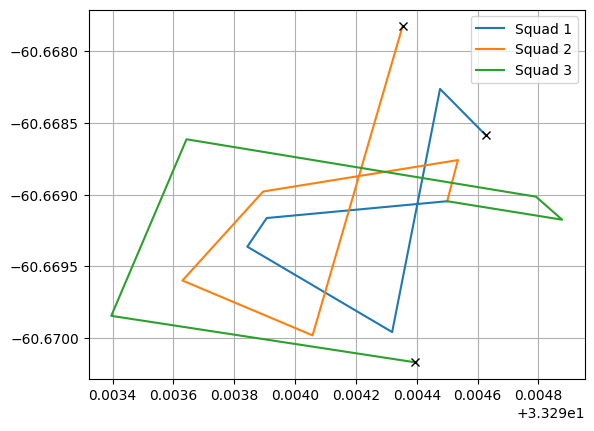

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from geopy.distance import geodesic

# Read the csv file using pandas read_csv() function and store it in a variable.
df = pd.read_csv('squad_coordinates1.csv')

# Create a dictionary to store the coordinates of each squad.
squad_coordinates = {
    1: [],
    2: [],
    3: []
}

# Iterate through the rows of the dataframe and add the coordinates to the corresponding squad's list in the dictionary.
for index, row in df.iterrows():
    if pd.notna(row['Squad']):
        squad = int(row['Squad'].split()[-1])
        if squad not in squad_coordinates:
            squad_coordinates[squad] = []
        coordinates = row['Coordinate'].split(' ')
        longitude = float(coordinates[0][1:-1])
        latitude = float(coordinates[1][:-1])
        if latitude < -90 or latitude > 90:
            raise ValueError("Latitude must be in the [-90; 90] range.")
        time = row['Time (minutes)']
        if squad == 1:
            squad_coordinates[squad].append((longitude, latitude, time))
        elif squad == 2:
            squad_coordinates[squad].append((longitude, latitude, time))
        elif squad == 3:
            squad_coordinates[squad].append((longitude, latitude, time))

# Plot the coordinates of each squad using matplotlib.pyplot.plot() function.
def plot_squad(squad):
    x = [c[0] for c in squad_coordinates[squad]]
    y = [c[1] for c in squad_coordinates[squad]]
    plt.plot(x, y, label=f'Squad {squad}')
    plt.plot(x[-1], y[-1], 'x', color='black')

squad_names = ['Squad 1', 'Squad 2', 'Squad 3', 'All Squads']

# Add a legend to the plot to differentiate between the squads.
def add_legend(ax):
    ax.legend()

# Create a function that takes a squad number as input and plots the path taken by that squad.
def plot_squad_path(squad_number):
    x = [c[0] for c in squad_coordinates[squad_number]]
    y = [c[1] for c in squad_coordinates[squad_number]]
    plt.plot(x, y, label=f'Squad {squad_number}')
    plt.plot(x[-1], y[-1], 'x', color='black')
    plt.legend()

# Calculate the time taken to reach each position for each squad and store it in a dictionary.
squad_times = {
    1: [],
    2: [],
    3: []
}

# Calculate the total time taken for each squad to reach their final position and store it in a dictionary.
total_times = {
    1: sum(df[df['Squad'] == 'Squad 1']['Time (minutes)']),
    2: sum(df[df['Squad'] == 'Squad 2']['Time (minutes)']),
    3: sum(df[df['Squad'] == 'Squad 3']['Time (minutes)'])
}

# Add up the time taken by each squad
total_time_all_squads = sum(total_times.values())

# Ask the user which squad they would like to see and plot the corresponding squad(s).
while True:
    squad_choice = input("Please insert the name of the squad you would like to see. (Squad 1, Squad 2, Squad 3, All Squads): ")
    if squad_choice not in squad_names:
        print("Invalid Response, please enter Squad 1, Squad 2, Squad 3, or All Squads")
    else:
        if squad_choice == 'All Squads':
            for squad in squad_coordinates.keys():
                plot_squad(squad)
                print(f"It took Squad {squad} to reach their final location in {total_times[squad]} minutes")
                print(f"Distances for Squad {squad}:")
                for i in range(len(squad_coordinates[squad])-1):
                    coord1 = squad_coordinates[squad][i][:2]
                    coord2 = squad_coordinates[squad][i+1][:2]
                    distance = geodesic(coord1, coord2).km
                    print(f"Distance between {coord1} and {coord2}: {distance:.2f} km")
                print()
        else:
            squad_number = int(squad_choice.split()[-1])
            plot_squad_path(squad_number)
            squad_coords = squad_coordinates[squad_number]
            coord1 = squad_coords[0][:2]
            coord2 = squad_coords[-1][:2]
            distance = geodesic(coord1, coord2).km
            print(f"It took Squad {squad_number} to reach their final location in {total_times[squad_number]} minutes")
            print(f"Distances for Squad {squad_number}:")
            for i in range(len(squad_coordinates[squad_number])-1):
                coord1 = squad_coordinates[squad_number][i][:2]
                coord2 = squad_coordinates[squad_number][i+1][:2]
                distance = geodesic(coord1, coord2).km
                print(f"Distance between {coord1} and {coord2}: {distance:.2f} km")
            print()
        add_legend(plt.gca())
        plt.grid(True)  # Add grid to the plot
        
        # Read the SatelliteImage.jpg file and display it as the background of the plot

        
        plt.show()
        break

#### Second Project, I could not get the Image to be placed onto the plot without it covering the data. 
I decided to do a side project to make up for this. This side project focuses on object recognition with neural nets. I decided to use yolov3 which is provided in order to create the code for object recognition. The result might be dispalyed on a seperate window below if it does now pop up. 

In [ ]:
!pip install opencv-python
!pip install numpy

In [2]:
import cv2
import numpy as np

# Load the pretrained YOLO model
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")

# Load the image
img = cv2.imread("ProjectImage2.jpg")

# Get the image dimensions
height, width, _ = img.shape

# Define the classes that the model can recognize
classes = []
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]

# Define the colors for the bounding boxes
colors = np.random.uniform(0, 255, size=(len(classes), 3))

# Preprocess the image
blob = cv2.dnn.blobFromImage(img, 1/255, (416, 416), (0, 0, 0), True, crop=False)

# Set the input for the model
net.setInput(blob)

# Get the output from the model
outs = net.forward(net.getUnconnectedOutLayersNames())

# Initialize the lists for the bounding boxes, confidences, and class IDs
boxes = []
confidences = []
class_ids = []

# Loop over each output from the model
for out in outs:
    # Loop over each detection in the output
    for detection in out:
        # Get the confidence and class ID
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        
        # Filter out weak detections
        if confidence > 0.5:
            # Get the center, width, and height of the bounding box
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            
            # Calculate the top-left corner of the bounding box
            x = int(center_x - w/2)
            y = int(center_y - h/2)
            
            # Add the bounding box, confidence, and class ID to the lists
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

# Apply non-maximum suppression to remove overlapping bounding boxes
indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

# Loop over each bounding box that survived non-maximum suppression
if len(indices) > 0:
    for i in indices.flatten():
        box = boxes[i]
        x, y, w, h = box
        
        # Draw the bounding box and label on the image
        color = colors[class_ids[i]]
        cv2.rectangle(img, (x, y), (x+w, y+h), color, 2)
        text = f"{classes[class_ids[i]]}: {confidences[i]:.2f}"
        cv2.putText(img, text, (x, y-5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

# Show the image
cv2.imshow("Image", img)
cv2.waitKey(0)
cv2.destroyAllWindows()
